📝 Project: Classification on Insurance Claims Dataset
In this project, we work with a real-world dataset related to vehicle insurance claims. The dataset contains customer information such as age, vehicle type, fuel type, region, subscription length, and whether or not an insurance claim was made. Our goal is to build a machine learning pipeline—from data exploration and preprocessing to model building and evaluation—to classify whether a customer is likely to file an insurance claim.

🎯 Objective
The main objective is to build and compare the performance of multiple machine learning models to accurately predict the insurance claim status (Claim or No Claim). This classification helps insurance companies assess risk and improve policy strategies.

The models evaluated include:

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

AdaBoost

XGBoost

📊 Evaluation Metrics
We assess the performance of each model using the following metrics:

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

✅ Outcome
By comparing these metrics, we aim to select the best-performing model for insurance claim classification and provide actionable insights to enhance customer risk assessment and improve business decisions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#To read csv file
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S1/Classification/Insurance claims data.csv")

In [3]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [6]:
#used to find null values and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [7]:
#count of null values
data.isna().sum() 

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [8]:
# claim_status distribution
claim_counts = data['claim_status'].value_counts()
print(claim_counts)

claim_status
0    54844
1     3748
Name: count, dtype: int64


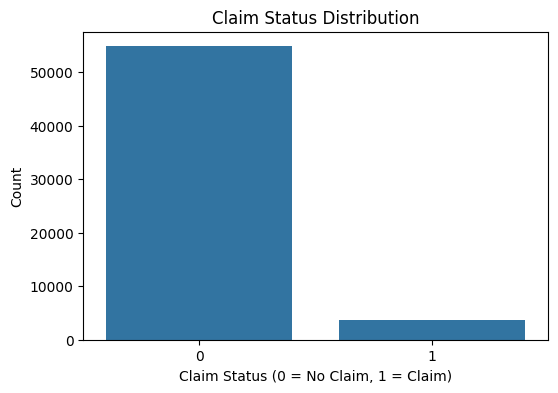

In [9]:
# plot claim status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='claim_status', data=data)
plt.title('Claim Status Distribution')
plt.xlabel('Claim Status (0 = No Claim, 1 = Claim)')
plt.ylabel('Count')
plt.show()

<h5>The above bar plot shows count of each class</h5>
<h5>The count of class '0' is very high and class '1' is less</h5>
<h5>We can say that our data is imbalance which leads to wrong predictions so we need to balance our data.</h5>


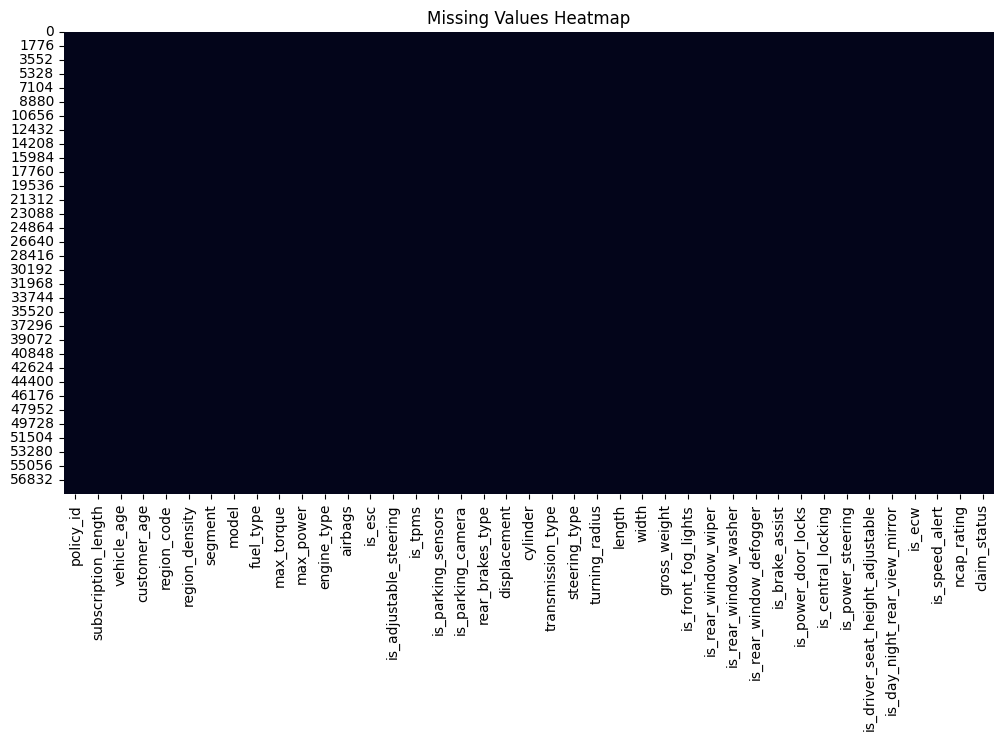

In [10]:
# missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

<p>The above heat map shows there are no missing values in my dataset</p>

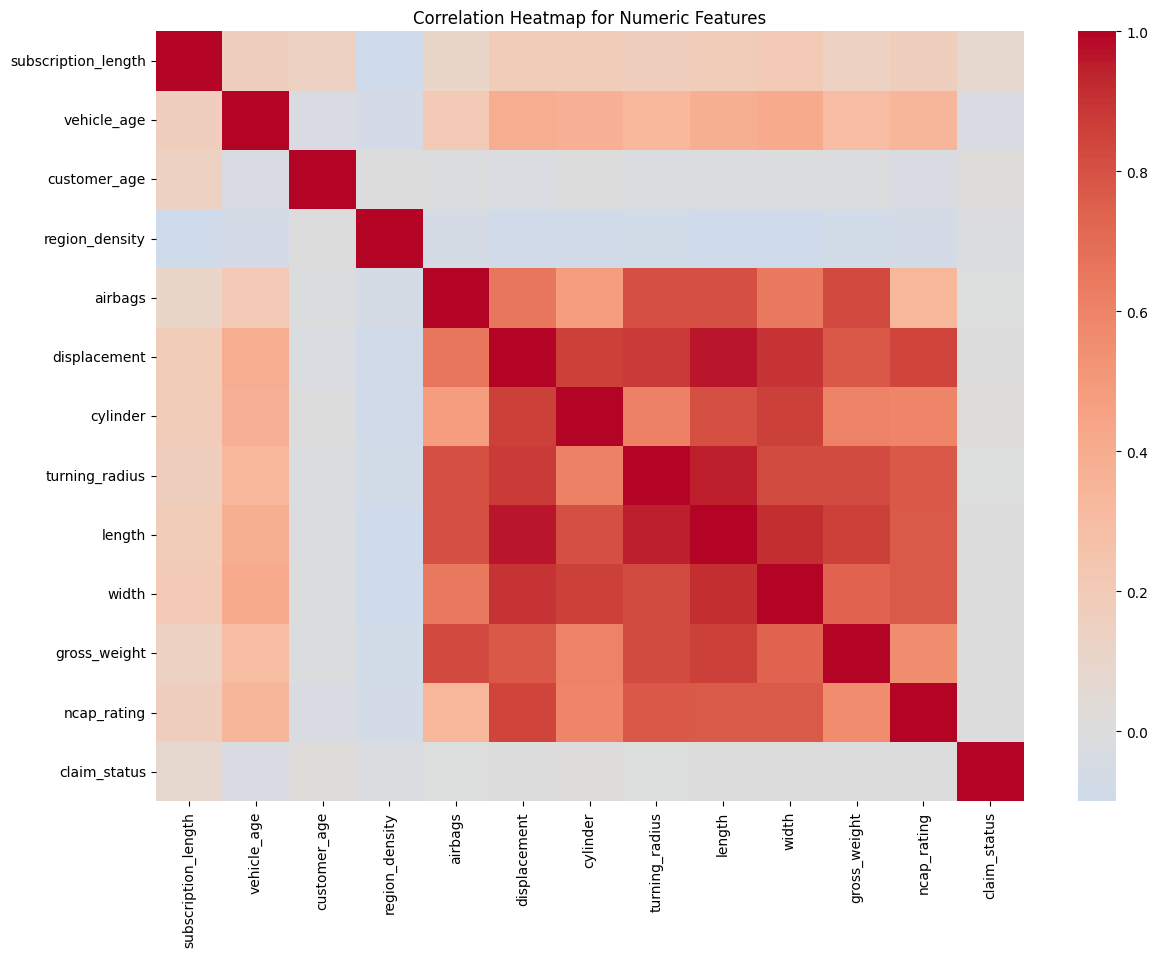

In [11]:
# correlations for numeric features
numeric_df = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(14,10))
cor = numeric_df.corr()
sns.heatmap(cor, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

Each cell shows the correlation coefficient (r) between two numeric features.

+1 (deep red): Perfect positive correlation

0 (light color): No correlation

-1 (blue/white): Perfect negative correlation

High Correlation Cluster Detected
There's a strong red square block in the lower-middle section of the heatmap:

Features like:

displacement

cylinder

turning_radius

length

width

gross_weight
are strongly correlated with each other.

These are mostly vehicle dimension or engine-related features, so it's logical that they're interdependent.

Weakly Correlated Features:

Features like subscription_length, vehicle_age, customer_age, and region_density show little to no strong correlation with other variables.
These may contribute more unique, independent information to your predictive model.

airbags Has Moderate Correlation:

airbags seems moderately correlated with some engine or dimension features, which might make sense as more powerful cars might be equipped with more safety features.



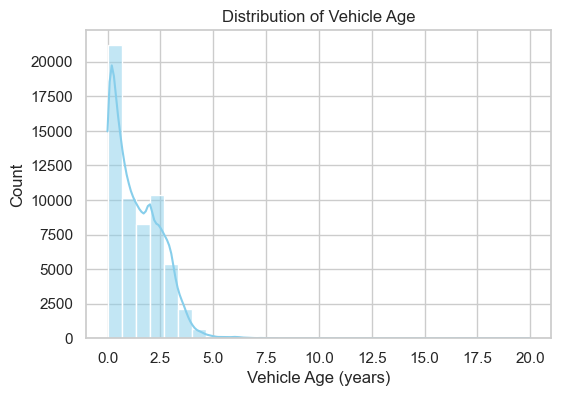

In [12]:

sns.set(style='whitegrid')

# 1. Distribution of vehicle_age
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='vehicle_age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Count')
plt.show()

<h5>The majority of vehicles are between 0 and 3 years old</h5>
<h5>Vehicles older than 5 years are rare in this dataset</h5>

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_2284/2375466361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='claim_status', y='subscription_length', data=data, palette='Set2')


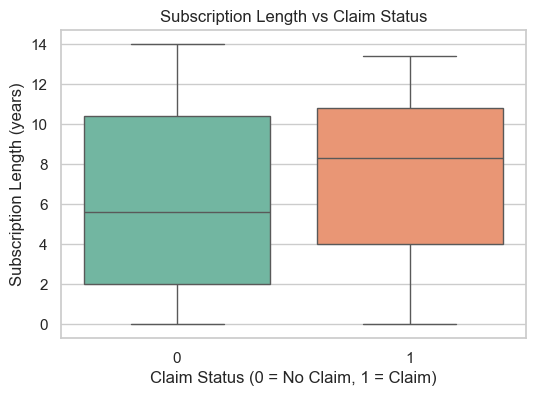

In [13]:
# 2. Boxplot: Subscription length by claim status
plt.figure(figsize=(6,4))
sns.boxplot(x='claim_status', y='subscription_length', data=data, palette='Set2')
plt.title('Subscription Length vs Claim Status')
plt.xlabel('Claim Status (0 = No Claim, 1 = Claim)')
plt.ylabel('Subscription Length (years)')
plt.show()

<h5>From the above box plot we can observe there are not outliers</h5>
<h5>The median subscription length for both claim and no-claim groups appears roughly similar, around 9 years</h5>
<h5>Customers who have made claim status=1 have a wider spread in subscription length</h5>

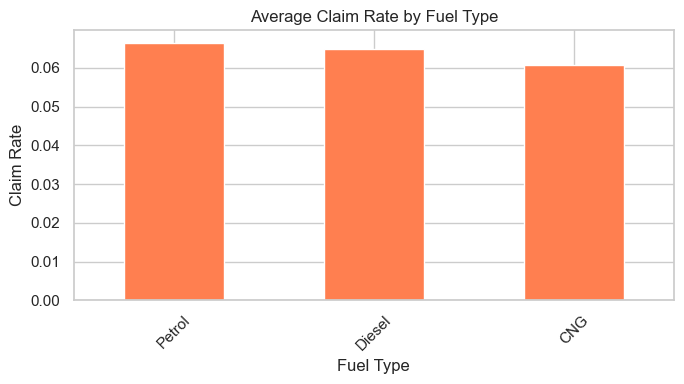

In [14]:
# 3. Claim rate by fuel type
fuel_claim = data.groupby('fuel_type')['claim_status'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
fuel_claim.plot(kind='bar', color='coral')
plt.title('Average Claim Rate by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Claim Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h5>Petrol vehicles have the highest claim rate</h5>
<h5>Diesel vehicles also have a high claim rate, slightly lower than petrol</h5>
<h5>Vehicles using CNG fuel have the lowest average claim rate among the three categories</h5>

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_2284/752039388.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(model_counts.index, rotation=45)


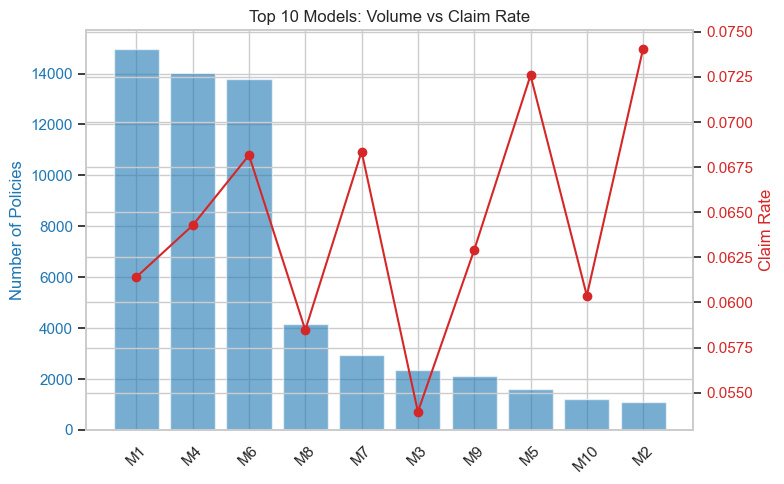

In [15]:
# 4. Top 10 models by number of policies and their claim rates
model_counts = data['model'].value_counts().head(10)
model_claim_rate = data.groupby('model')['claim_status'].mean().loc[model_counts.index]
fig, ax1 = plt.subplots(figsize=(8,5))
color = 'tab:blue'
ax1.bar(model_counts.index, model_counts.values, color=color, alpha=0.6)
ax1.set_ylabel('Number of Policies', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(model_counts.index, rotation=45)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(model_counts.index, model_claim_rate.values, color=color, marker='o')
ax2.set_ylabel('Claim Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Top 10 Models: Volume vs Claim Rate')
plt.tight_layout()
plt.show()


<h5>M1 model has the largest number of policies over 14,000 but it's claim rate is moderate around(6%)</h5>
High claim rates not always tied to high volume:
<h5>
M2, despite having the lowest volume, has the highest claim rate (≈ 7.5%).</h5>
<h5>M9 and M6 have relatively low volumes but high claim rates, making them riskier per policy.</h5>
<h5>M3 has one of the lowest claim rates (~5.5%), even though its volume is mid-level, making it potentially less risky.</h5>
M4 and M6 also show contrast:
<h5>M4 has a high volume but also a fairly high claim rate, signaling it may need closer monitoring.</h5>
<h5>M6 has a mid-to-low volume but a notably high claim rate.</h5>

In [16]:

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  
  
from imblearn.over_sampling import SMOTE  
  
# individual models  
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  
from xgboost import XGBClassifier  

In [17]:
X = data.drop('claim_status', axis = 1)  
y = data['claim_status']  
  
# 1.3 Identify categorical vs numeric columns  
cat_cols = X.select_dtypes(include = ['object']).columns.tolist()  
num_cols = X.select_dtypes(exclude = ['object']).columns.tolist()

In [18]:
# 1.4 Build a preprocessing pipeline  
preprocess = ColumnTransformer(  
    transformers = [  
        ('cat', Pipeline(steps=[  
            ('lbl',  'passthrough')  # we will label-encode later (needs fit on full data)  
        ]), cat_cols),  
        ('num', StandardScaler(), num_cols)  
    ],  
    remainder = 'drop'  
)  

In [19]:
# 1.5 Apply LabelEncoder to every categorical column BEFORE the pipeline  
for col in cat_cols:  
    le = LabelEncoder()  
    X[col] = le.fit_transform(X[col]) 

In [20]:
# 1.6 Train / test split  
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size = 0.25, stratify = y, random_state = 42  
)  

In [21]:
smote = SMOTE(random_state = 42)  
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
  
print('After SMOTE class distribution:')  
print(y_train_bal.value_counts()) 

After SMOTE class distribution:
claim_status
0    41133
1    41133
Name: count, dtype: int64


<h1>Logistic Regression</h1>

In [22]:
log_model = Pipeline(steps=[  
    ('scale', StandardScaler()),     # scaling again is safe  
    ('clf', LogisticRegression(max_iter = 1000, class_weight = 'balanced'))  
])  
  
log_model.fit(X_train_bal, y_train_bal)  
  
y_pred = log_model.predict(X_test)  
print('--- Logistic Regression ---')  
print(classification_report(y_test, y_pred))  

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13711
           1       0.08      0.05      0.06       937

    accuracy                           0.90     14648
   macro avg       0.51      0.51      0.51     14648
weighted avg       0.88      0.90      0.89     14648



<h1>Navie Bayes</h1>

In [23]:
nb_model = GaussianNB()  
nb_model.fit(X_train_bal, y_train_bal)  
  
y_pred = nb_model.predict(X_test)  
print('--- Naive Bayes ---')  
print(classification_report(y_test, y_pred))  

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.94      0.45      0.61     13711
           1       0.07      0.60      0.12       937

    accuracy                           0.46     14648
   macro avg       0.51      0.52      0.36     14648
weighted avg       0.89      0.46      0.58     14648



<h1>Decision Tree</h1>

In [24]:
dt_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)  
dt_model.fit(X_train_bal, y_train_bal)  
  
y_pred = dt_model.predict(X_test)  
print('--- Decision Tree ---')  
print(classification_report(y_test, y_pred))  

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     13711
           1       0.09      0.12      0.10       937

    accuracy                           0.86     14648
   macro avg       0.51      0.52      0.51     14648
weighted avg       0.88      0.86      0.87     14648



<h1>Random Forest</h1>

In [25]:
rf_model = RandomForestClassifier(  
    n_estimators = 200,  
    class_weight = 'balanced',  
    random_state = 42,  
    n_jobs = -1  
)  
rf_model.fit(X_train_bal, y_train_bal)  
  
y_pred = rf_model.predict(X_test)  
print('--- Random Forest ---')  
print(classification_report(y_test, y_pred))  

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13711
           1       0.12      0.06      0.08       937

    accuracy                           0.91     14648
   macro avg       0.53      0.51      0.52     14648
weighted avg       0.89      0.91      0.90     14648



<h1>AdaBoost</h1>

In [26]:
ada_model = AdaBoostClassifier(  
    n_estimators = 200,  
    random_state = 42  
)  
ada_model.fit(X_train_bal, y_train_bal)  
  
y_pred = ada_model.predict(X_test)  
print('--- AdaBoost ---')  
print(classification_report(y_test, y_pred))  

--- AdaBoost ---
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     13711
           1       0.10      0.16      0.12       937

    accuracy                           0.85     14648
   macro avg       0.52      0.53      0.52     14648
weighted avg       0.89      0.85      0.87     14648



<h1>XGBoost</h1>

In [27]:
xgb_model = XGBClassifier(  
    objective = 'binary:logistic',  
    n_estimators = 300,  
    learning_rate = 0.05,  
    max_depth = 5,  
    subsample = 0.8,  
    colsample_bytree = 0.8,  
    eval_metric = 'logloss',  
    scale_pos_weight = 1  # SMOTE already balanced  
)  
xgb_model.fit(X_train_bal, y_train_bal)  
  
y_pred = xgb_model.predict(X_test)  
print('--- XGBoost ---')  
print(classification_report(y_test, y_pred))  

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13711
           1       0.12      0.04      0.05       937

    accuracy                           0.92     14648
   macro avg       0.53      0.51      0.51     14648
weighted avg       0.88      0.92      0.90     14648



/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_2284/1179932139.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


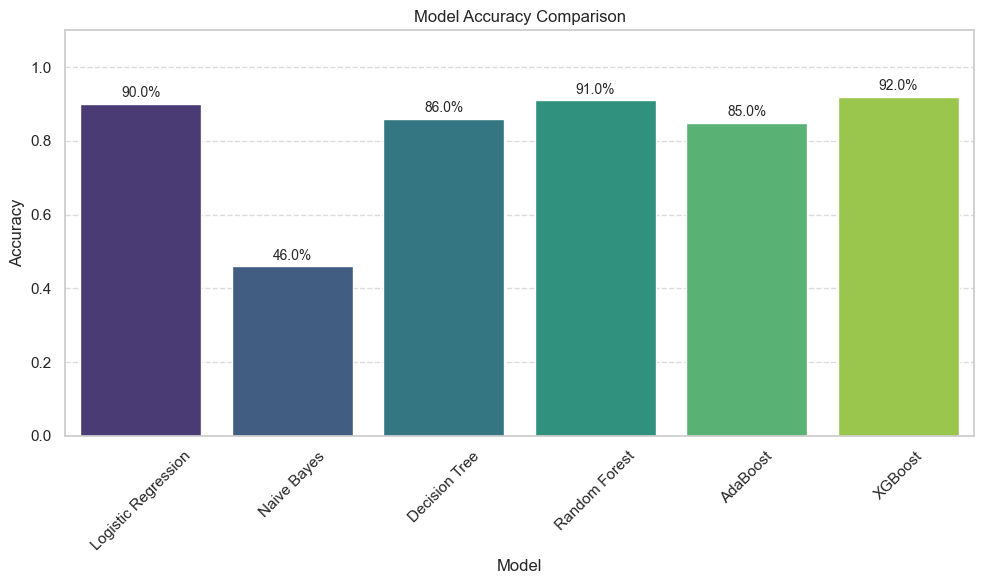

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
d = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest','AdaBoost','XGBoost'],
    'Accuracy': [0.90, 0.46, 0.86, 0.91, 0.85, 0.92]
}

df = pd.DataFrame(d)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

# Add percentage labels on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h5>XGBoost achieved the highest accuracy of 92% making it the most effective model for this insurance claims classification task</h5>
<h5>Adaboost and random forest both are ensemble models show strong, reliable perfomance, nearly matching XGBoost</h5>
<h5>Logistic Regression Performs well</h5>
<h5>Navie Bayes Performs the worst due to violation of feature independence assumptions.</h5>
<h5>Decision 86% accuracy, good but clearly outperformed by ensemble methods like Random Forest and boosting algorithms.</h5>